<a href="https://colab.research.google.com/github/evany24/Predictions-of-Product-Sales/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: The Prediction of Product Sales

- Evan Yeslow

## Project Overview

## Load and Inspect Data

### **Loading Data**

In [1]:
#import pandas
import pandas as pd
filename = '/content/drive/MyDrive/sales_predictions.xlsx'
df = pd.read_excel(filename)
#MissingNo
import missingno as msno
#import numpy
import numpy as np
#seaborn
import seaborn as sns
#matplotlib
import matplotlib.pyplot as plt

### **Inspect Data**

#### **info()**

In [2]:
## Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### **head()**

In [3]:
## Display the first (5) rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### **dtypes()**

In [4]:
## Display the column names and datatypes for each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### **shape()**

In [5]:
## Display the number of rows and columns for the dataframe
df.shape

(8523, 12)

#### **describe()**

In [6]:
## Display the descriptive statistics for the numeric columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* We can see that Item_Fat_Content has too many descriptors. Outlet_Size descriptors can be updated. There are misssing values in the Outlet_Size and Outlet_Weight column

## Clean Data

### **Remove unnecessary columns**

#### **Inspect Column Datatypes for Errors**

* Check the data types of the dataframe using df.dtypes or df.info()

In [7]:
## Display column names and datatypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### **Inspect Column Names for Errors**

In [8]:
## Display column names
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

* No errors seen

#### **Inspect Values for Errors**

##### **Numeric Columns**

In [9]:
# View the numberic statistics for columns contain numberical values
df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### **Consistency in Categorical Columns**

In [10]:
# Create a series of the datatypes
data_types = df.dtypes
# Create a filter to select only the object datatypes
object_data_types = data_types[(data_types == 'object')]
# Display the series of object datatypes
object_data_types

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [11]:
## Loop through the index of object_data_types 
for column in object_data_types.index:
  # Display the unique values for the column
  print(df[column].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


* We can see that Outlet_Size has missing values and that the category High can be changed to Large to act as a more accurate description
* We can also see that Item_Fat_Content categories can be consolidated into Low Fat and Regular


### **Remove unnecassary rows**

#### Duplicates

In [12]:
# check for duplicate values
df.duplicated().sum()

0

* There are no duplicates

### **Missing Values**

In [13]:
# Total missing values
df.isna().sum().sum()

3873

In [14]:
# Missing values in each column
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
## Display the percentage of missing values by column
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


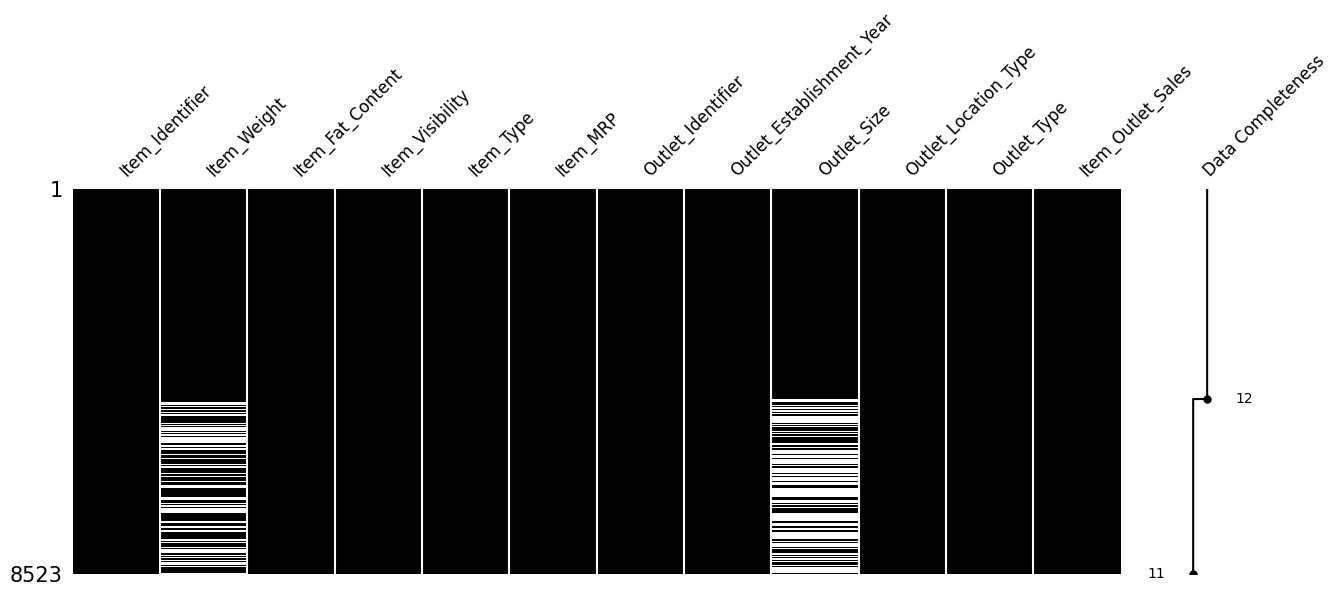

In [16]:
# Display missing values by column
msno.matrix(df, figsize=(15,5), labels=True, 
            fontsize=12, sort="descending", color=(0,0,0));

#### **Item_Weight**



* We will use the average of item weights to fill in the missing Item_Weight values<br>
* The average value is seldom going to be the exact correct value, but it will be the value that is likely to be closest to the correct value, given the available information. 


In [17]:
#average of Item_Weights
iw_avg = df['Item_Weight'].mean()

In [18]:
#fill missing Item_Weights with average
df['Item_Weight'].fillna(iw_avg, inplace=True)

#### **Outlet_Size**

* Almost 29 percent of the values for Outlet_Size are missing, we don't want to miss the chance to analyze certain patterns or make certain predictions so we will create a new category as 'Unknown' to fill those values

In [19]:
# fill missing values in Outlet_Size with 'Unknown'
df['Outlet_Size'].fillna(value = 'Unknown', inplace = True)

In [20]:
# values for data in the Outlet_Size column
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

* The missing values have been changed to 'Unknown'

In [21]:
# Total missing values
df.isna().sum().sum()

0

In [22]:
# Missing values in each column
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

* There are no more missing values

### **Get rid of excess categories**

In [23]:
# replace LF and low fat to Low Fat and reg to Regular
df.replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': "Regular"}, inplace = True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

* We now have 'Low Fat' and 'Regular' as our values for the Item_Fat_Content column

In [24]:
# change the descriptor for Outlet_Size from High to Large
df.replace({'High': 'Large'}, inplace=True)

In [25]:
# Display the unique values from the column Outlet_Size
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

* We now have 'Large' instead of 'High' for our category in the Outlet_Size column

## Exploratory Data Analysis

### Numerical Columns

#### Item Weight

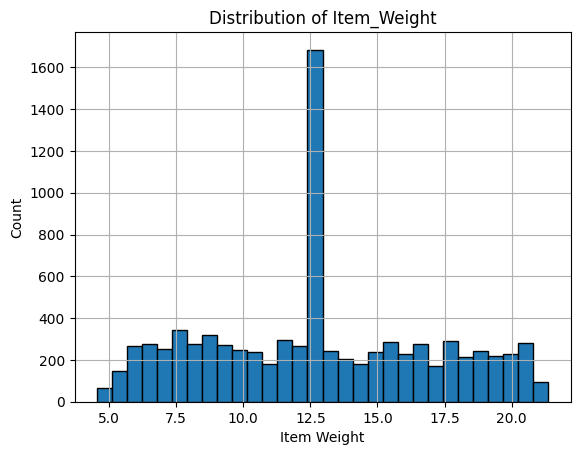

In [26]:
#Histogram of Item Weight
ax = df['Item_Weight'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item_Weight')
ax.set_xlabel('Item Weight')
ax.set_ylabel('Count');

#### Item Visibility

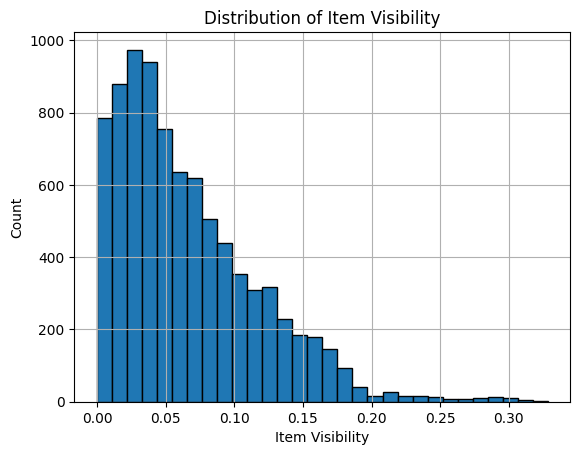

In [27]:
#Histogram of Item Visibility
ax = df['Item_Visibility'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item Visibility')
ax.set_xlabel('Item Visibility')
ax.set_ylabel('Count');

#### Item MRP

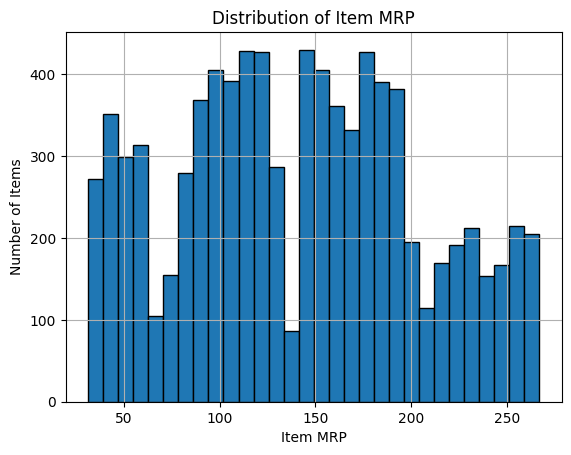

In [28]:
#histogram of Item MRP
ax = df['Item_MRP'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item MRP')
ax.set_xlabel('Item MRP')
ax.set_ylabel('Number of Items');

#### Item Outlet Sales

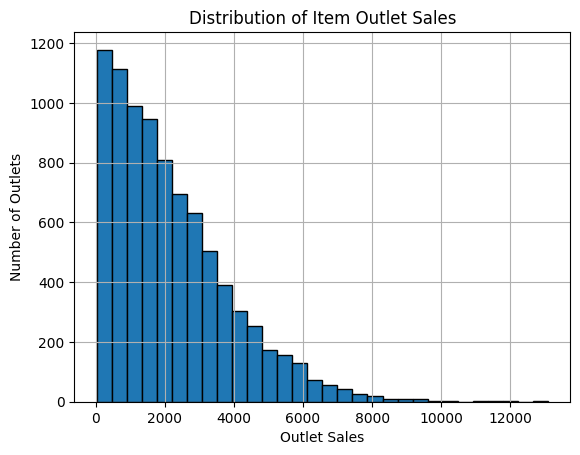

In [29]:
#histogram of Outlet Sales
ax = df['Item_Outlet_Sales'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x')
ax.ticklabel_format(style='plain')
ax.set_title('Distribution of Item Outlet Sales')
ax.set_xlabel('Outlet Sales')
ax.set_ylabel('Number of Outlets');

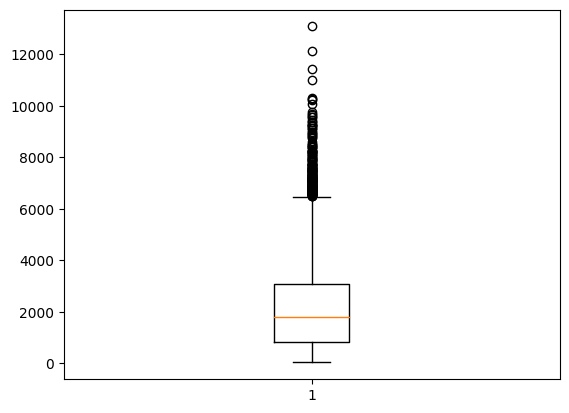

In [30]:
#boxplot of Item Sales
data = df['Item_Outlet_Sales']
fig, ax = plt.subplots()
ax.boxplot([data]);

### Categorical Columns

#### Item Fat Content

In [31]:
Item_Fat_Content_Value_Counts = df['Item_Fat_Content'].value_counts().sort_values()

In [32]:
#value counts for Item Fat Content
Item_Fat_Content_Value_Counts

Regular    3006
Low Fat    5517
Name: Item_Fat_Content, dtype: int64

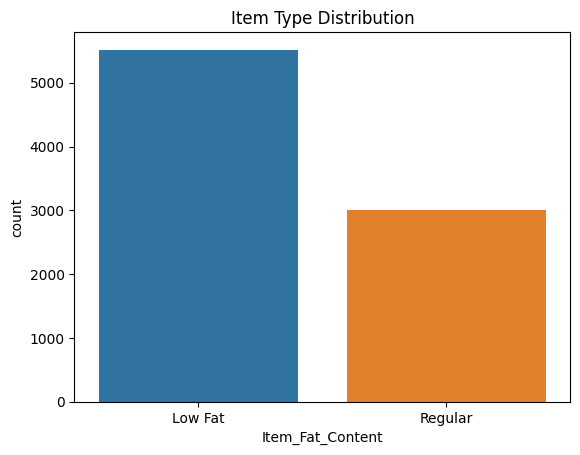

In [33]:
#Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df, x='Item_Fat_Content')
# Set Title
ax.set_title('Item Type Distribution');                  

#### Item Type

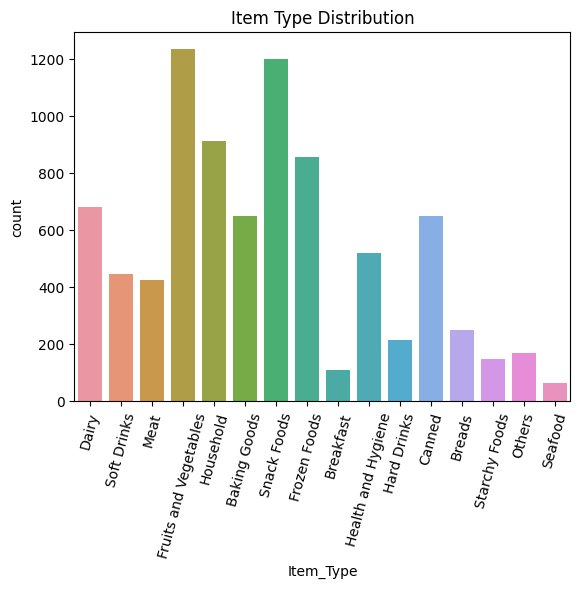

In [34]:
# Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df, x='Item_Type')
#rotate the x-axis labels so they do not overlap
plt.xticks(rotation=75)
## Set the Title
ax.set_title('Item Type Distribution');

#### Outlet Identifier

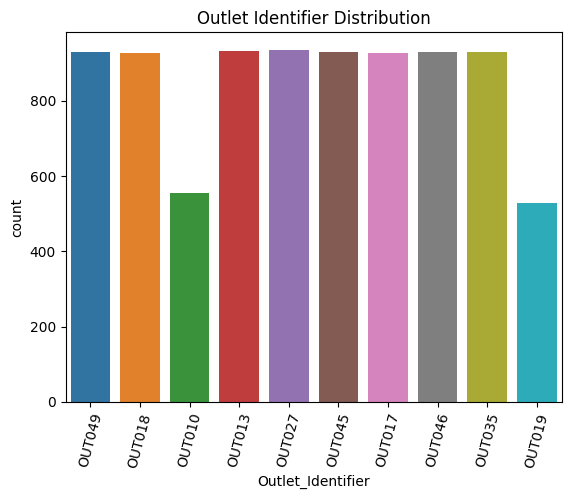

In [35]:
# Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df, x='Outlet_Identifier')
#rotate the x-axis labels so they do not overlap
plt.xticks(rotation=75)
## Set the Title
ax.set_title('Outlet Identifier Distribution');

#### Outlet Size

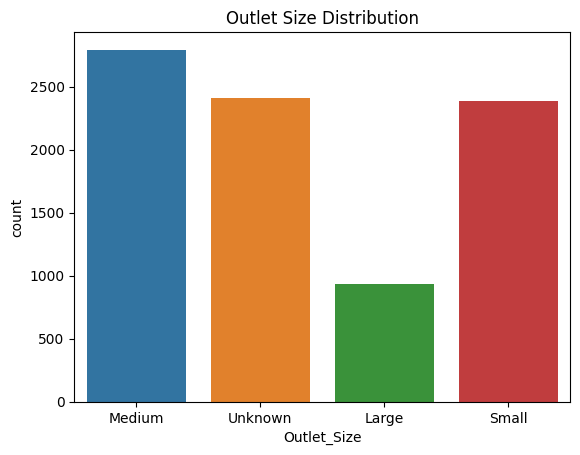

In [36]:
# Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df, x='Outlet_Size')
## Set the Title
ax.set_title('Outlet Size Distribution');

#### Outlet Location Type

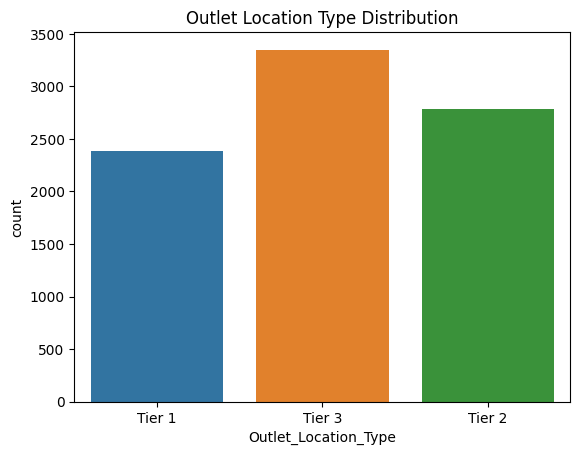

In [37]:
# Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df, x='Outlet_Location_Type')
#rotate the x-axis labels so they do not overlap
ax.set_title('Outlet Location Type Distribution');

#### Outlet Type

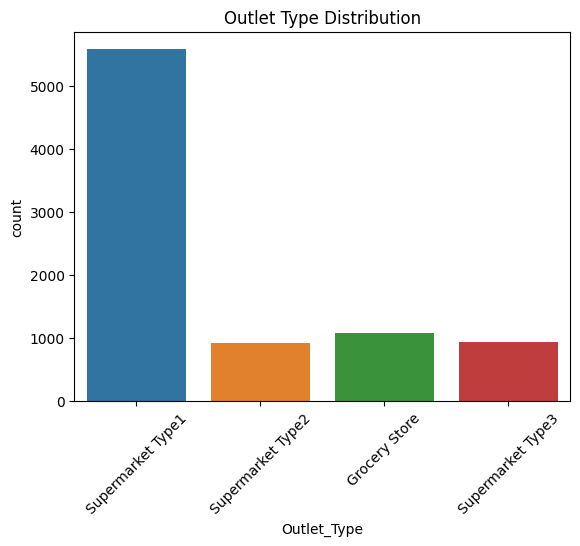

In [38]:
# Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df, x='Outlet_Type')
#rotate the x-axis labels so they do not overlap
plt.xticks(rotation=45)
## Set the Title
ax.set_title('Outlet Type Distribution');

###Correlation

#### Item Outlet Sales by Outlet Size

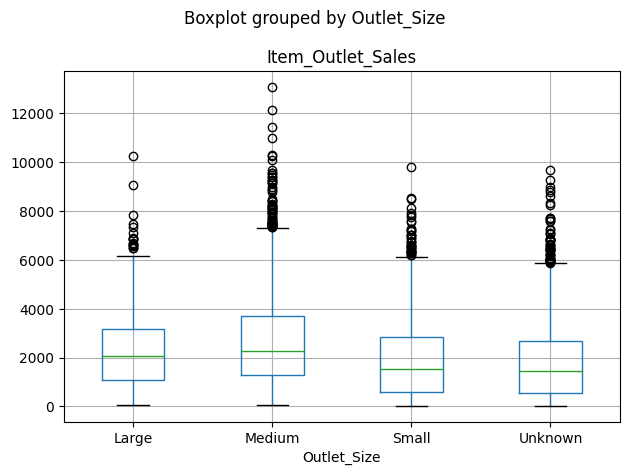

In [39]:
#boxplot for Item Outlet Sales by Outlet Size
ax = df.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Size')
plt.tight_layout();

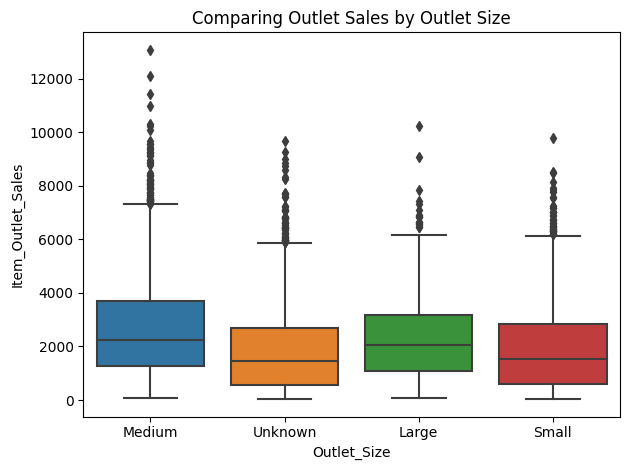

In [40]:
#seaborn boxplot for outlet sales by outlet size
ax = sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Outlet Sales by Outlet Size")
plt.tight_layout();

* Outlet Sales are highest in the medium size stores. Large has the next highest. The small and unknown size stores have similar outlet sales.

#### Item Outlet Sales by Outlet Type

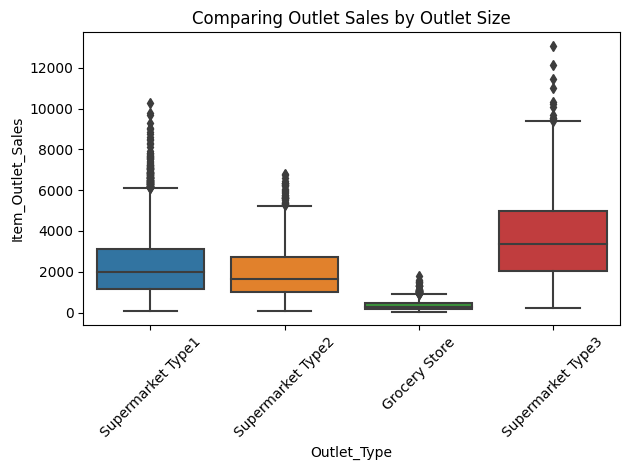

In [41]:
#seaborn boxplot for Item Outlet Sales by Outlet Type
ax = sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Outlet Sales by Outlet Size")
ax.tick_params(axis='x', rotation=45)
plt.tight_layout();

* It appears that Supermarket Type 3 has the largest Item Outlet Sales followed by Type 1 and Type 2. Grocery stores have the lowest Item Outlet Sales.

#### Item Outlet Sales by Outlet Location Type

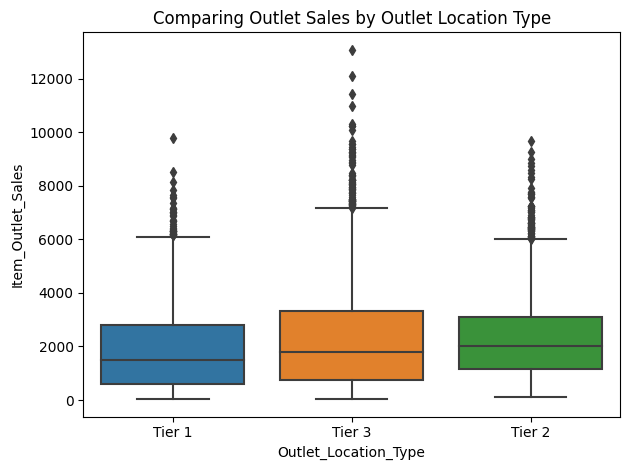

In [42]:
#seaborn boxplot for Outlet Sales by Outlet Location Type
ax = sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Outlet Sales by Outlet Location Type")
plt.tight_layout();

* Item Outlet Sales are highest in Tier 3 type stores followed by Tier 2 and then tier 1.

#### Heatmap

<ipython-input-43-16a178e89efa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012049  0.024756   
Item_Visibility              -0.012049         1.000000 -0.001315   
Item_MRP                      0.024756        -0.001315  1.000000   
Outlet_Establishment_Year    -0.008301        -0.074834  0.005020   
Item_Outlet_Sales             0.011550        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.008301           0.011550  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


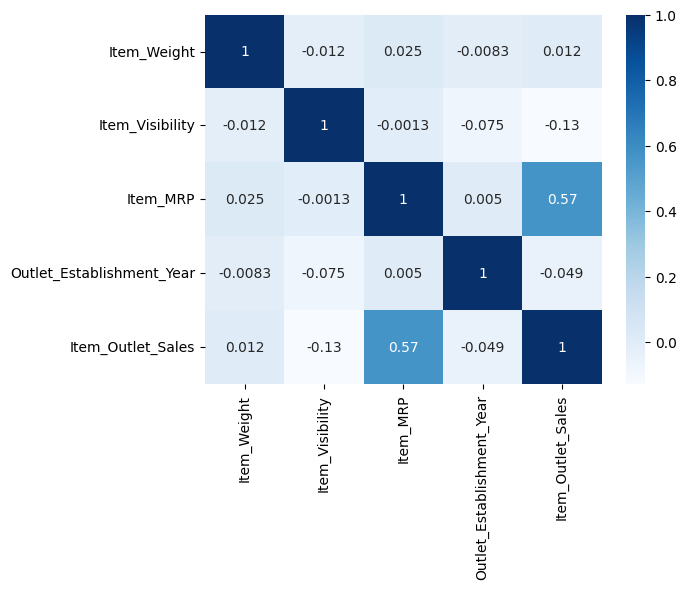

In [43]:
#new df for correlation
corr = df.corr()
#print corr
print(corr);
#display heatmap for corr
sns.heatmap(corr, cmap = 'Blues', annot = True);

* There is a moderate postiive correlation between Item Outlet Sales and Item MRP. It also appears there is a negative correlation when Item Visibility is correlated to Item Outlet Sales.

In [ ]:
#seaborn pairplot
sns.pairplot(df);

## Explanatory Data Analysis